# ML Sketch

# Goal
The goal of this activity is to examine library implementations of each ML category. You'll go through the code and discuss code implementation and design issues with the class during the lab. It might be useful to modify the code or parameters so you can understand how it works better!



In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython import display
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

%matplotlib inline

# Classification

## Toy Data Preparation

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

X shape: (100, 2)
y shape: (100,)


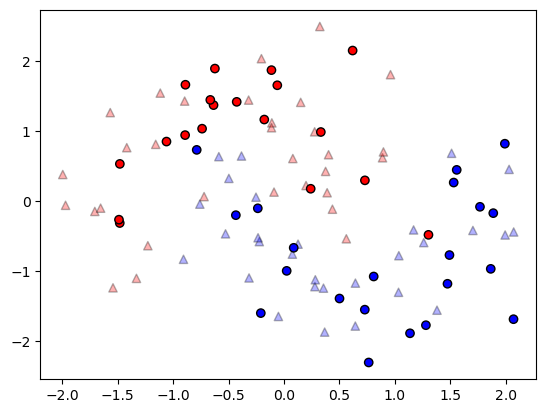

In [3]:
############################################################################
# Make classification data
X,y = make_moons(noise=0.3, random_state=0)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

############################################################################
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
# Standardize the data 
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

#############################################################################
# Plotting Code
# Colors for markers
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           marker='^', edgecolors='k', alpha=0.3)
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=1);

## Train

In [4]:
#############################################################################
# Train KNN classifier 
classifier = KNeighborsClassifier(5)
classifier.fit(X_train, y_train)

#############################################################################
# Evaluate test accuracy
acc = classifier.score(X_test, y_test)
print(f"Accuracy: {acc}")

Accuracy: 0.975


## Results

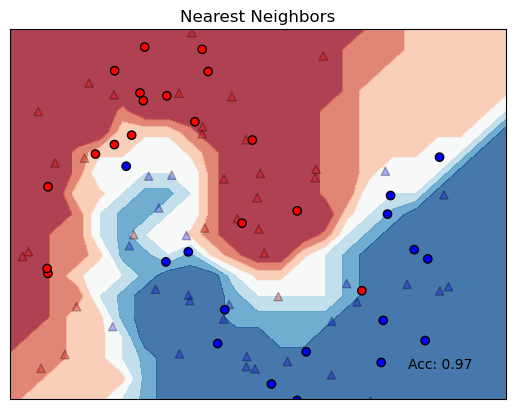

In [5]:
#############################################################################
# Decision boundary for plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))
# Probs for each point in meshgrid for shading
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
# Plot the decision boundary (i.e., shading). For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

#############################################################################
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           marker='^', edgecolors='k', alpha=0.3)
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=1)

#############################################################################
# Set different aspects of plot such as ticks, title, 
plt.xlim([xx.min(), xx.max()])
plt.ylim([yy.min(), yy.max()])
plt.xticks(())
plt.yticks(())
plt.title("Nearest Neighbors")
plt.text(xx.max() - .3, yy.min() + .3, (f"Acc: {acc:.2f}").lstrip('0'),
        size=10, horizontalalignment='right');

# Regression

## Toy Data

In [6]:
from sklearn.neural_network import MLPRegressor

In [7]:
# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

## Train

In [8]:
# #############################################################################
# Regression models
regr = MLPRegressor(hidden_layer_sizes=(25,25,25,25), activation='relu', learning_rate_init=0.001, max_iter=300)
# #############################################################################
# Fit regression model
regr.fit(X, y)
# #############################################################################
# Prediction
y_hat = regr.predict(X)

## Results

Text(0, 0.5, 'target')

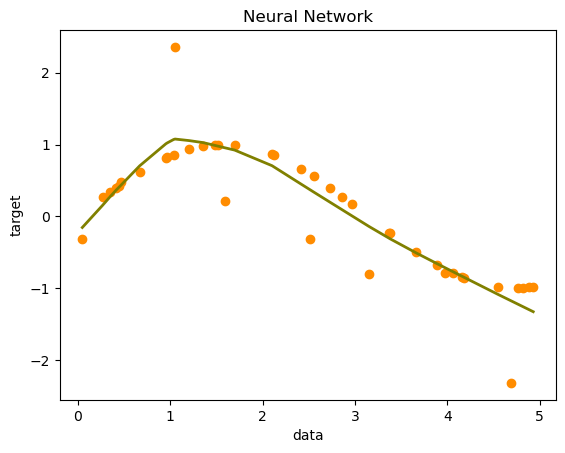

In [9]:
# #############################################################################
# Look at the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_hat, color="olive", lw=2, label='preds')
plt.title("Neural Network")
plt.xlabel('data')
plt.ylabel('target')

# Clustering

## Toy Data

In [10]:
from sklearn import cluster
from itertools import cycle, islice

X shape: (1500, 2)


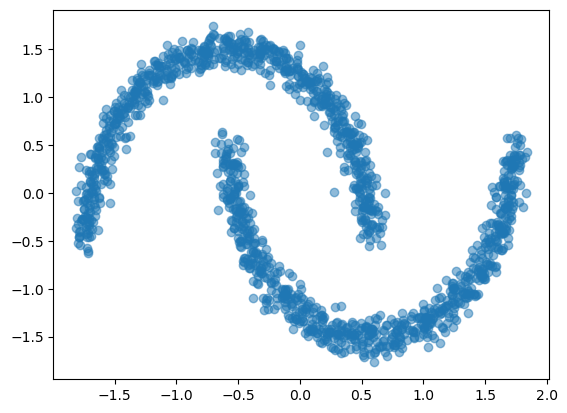

In [11]:
#############################################################################
# Set numpy seed
np.random.seed(0)

#############################################################################
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
X, y = make_moons(n_samples=n_samples, noise=.05)

# Standardize the dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

print(f"X shape: {X.shape}")
plt.scatter(X[:, 0], X[:, 1], alpha=0.5);

## Train

In [12]:
#############################################################################
# Cluster using Kmeans
kmeans = cluster.MiniBatchKMeans(n_clusters=5)
 
kmeans.fit(X)

if hasattr(kmeans, 'labels_'):
    y_hat = kmeans.labels_.astype(int)
else:
    y_hat = kmeans.predict(X)

## Results

([], [])

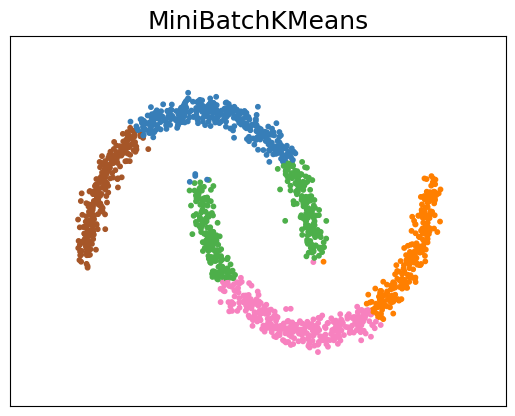

In [13]:
############################################################################
# Set colors to be used for different clusters
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_hat) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

############################################################################
# Plot data and predicted labels from clustering
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_hat])

plt.title('MiniBatchKMeans', size=18)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())

# Reinforcement Learning

You need to install Gymnasium for this exercise by running `pip install gymnasium` on terminal. 
Please check [this link](https://github.com/Farama-Foundation/Gymnasium) to directly access to the GitHub repo. 

In [14]:
pip install gymnasium[classic-control]

zsh:1: no matches found: gymnasium[classic-control]
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install moviepy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110711 sha256=885b283d2a4c7860c74de1622492c5bc9f81049e59e6397382e8d83bb67f1c95
  Stored in directory: /Users/mylesgreen/Library/Caches/pip/wheels/29/15/e4/4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
  Created wheel for imageio_ffmpeg: filename=imageio_ffmpeg-0.5.1-py3-none-any.whl size=16724 sha256=24892515adbe233228e92462c939d239efc59c7e8be01ef485d71c81817498de
  Stored in directory: /Users/mylesgreen/Library/Caches/pip/wheels/a9/1f/a5/4902cfc75bc6b728b4c66e13f5e4863200337550b780ec7f33
Successfully built moviepy imageio_ffmpeg
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
Note: you may need to restart the kernel to use updated packages.


## Environment: MountainCar

In [16]:
# https://gymnasium.farama.org/
import gymnasium as gym

import glob
import io
import base64

ModuleNotFoundError: No module named 'gymnasium'

In [ ]:
def find_video(folder_name):
    search_for = f'{folder_name}/*.mp4'
    mp4list = glob.glob(search_for)
    if len(mp4list) > 0:
        return mp4list
    else:
        print(f"Cound not find video at {search_for}")

ACTIONS = ['<-', '  ', '->']


In [ ]:
env = gym.make('MountainCar-v0', render_mode="rgb_array")
video_folder = "moutain-car/example"
env = gym.wrappers.RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: True)

obs = env.reset()
done = False
while not done:
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.close()

In [ ]:
video_path = find_video(video_folder)
print(video_path[-1])
assert len(video_path) == 1
display.Video(video_path[-1], embed=True)

## Train

In [ ]:
env.observation_space

In [ ]:
env.action_space.n

In [ ]:
env = gym.make('MountainCar-v0', render_mode="rgb_array")

DISCRETE_OBSERVATION_SPACE_SIZE = [
    20] * len(env.observation_space.high)  # will give out 20*20 list

# see how big is the range for each of the 20 different buckets
discrete_os_win_size = (env.observation_space.high -
                        env.observation_space.low) / DISCRETE_OBSERVATION_SPACE_SIZE

LEARNING_RATE = 0.1
DISCOUNT = 0.95  # how important we find the new future actions are ; future reward over current reward
EPISODES = 500

# even though the solution might have been found, we still wish to look for other solutions
epsilon = 0.5  # 0-1 ; higher it is, more likely for it to perform something random action
START_EPSILON_DECAYING = 1
# python2 style division - gives only int values
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)

# Q learning
# so we will have now a table such that each row will have 400 (20*20) rows for the possible state the agent can be in
# and 3 columns for the 3 possible actions
# the agent will see which state it is in and take the action corresponding to the largest Q value

# Create a randomised q_table and agent will update it after exploring the environment
q_table = np.random.uniform(
    low=-2, high=0, size=(DISCRETE_OBSERVATION_SPACE_SIZE + [env.action_space.n]))

# how to set low and high limits of rewards ? - if you see the rewards printed in below cell, they are mostly -1 and
# might be something +ve only when you reach goal. Needs tweaking and playing around
# print(q_table.shape)


def get_discrete_state(state):
    if isinstance(state, tuple):
        state = state[0]
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(int))  # return as tuple


epsilon_log = []
reward_log = []

for ep in range(EPISODES):
    done = False
    discrete_state = get_discrete_state(env.reset())  # initial discrete state

    sum_reward = 0
    while not done:  # goal reached means reward = 0

        if np.random.random() > epsilon:
            # in this environment, 0 means push the car left, 1 means to do nothing, 2 means to push it right
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)

        # Run one timestep of the environment's dynamics;  returns a tuple (observation, reward, done, info).
        new_state, reward, done, _, _ = env.step(action)
        sum_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if not done:
            # max q value for the next state calculated above
            max_future_q = np.max(q_table[new_discrete_state])

            # q value for the current action and state
            current_q = q_table[discrete_state + (action, )]

            new_q = (1 - LEARNING_RATE) * current_q + \
                LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # based on the new q, we update the current Q value
            q_table[discrete_state + (action, )] = new_q

        # goal reached; reward = 0 and no more negative
        elif new_state[0] >= env.unwrapped.goal_position:
            # its like a snowbal effect, once the goal is reached - it will most likely reach again soon enough
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state

    if END_EPSILON_DECAYING >= ep >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    epsilon_log.append(epsilon)
        
    reward_log.append(sum_reward)

env.close()


## Results

In [ ]:
# Plot reward over steps
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(reward_log)
plt.ylabel("Sum of Rewards")

# Plot epsilon decay over steps
plt.subplot(1,2,2)
plt.plot(epsilon_log)
plt.ylabel("epsilon")

## Test

In [ ]:
env = gym.make('MountainCar-v0', render_mode="rgb_array", max_episode_steps=500)
video_folder = "moutain-car/test"
env = gym.wrappers.RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: True)

obs = env.reset()

done = False
while not done:
    # Select best action using q-values
    discrete_state = get_discrete_state(obs)
    action = np.argmax(q_table[discrete_state])
    
    # apply the action
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

# Close the env
env.close()

In [ ]:
video_path = find_video(video_folder)
print(video_path[-1])
assert len(video_path) == 1
display.Video(video_path[-1], embed=True)